In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
from __future__ import division
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
sns.set(style='ticks', palette='Set2')
%matplotlib inline

# Encouraging sparse solutions: L1 regularization and Lasso

In the same way that in Ridge regression we modify the objective, here too we do the same thing, and again with a regularizer. Instead of using the squared Euclidean norm, we use the so-called L1 norm. Thus, instead of solving for the minimizer of the Sum of the Squared Error (SSE), we solve:

$$
\min_{\beta}:\,\, {\rm SSE}(\beta) + \lambda \sum |\beta_i| =  {\rm SSE}(\beta) + \lambda \|\beta\|_1.
$$

Why should we expect this to encourage sparsity?

In [52]:
# generate some sparse data to play with
np.random.seed(7)

n_samples, n_features = 100, 200
X = np.random.randn(n_samples, n_features)

k = 5
# beta generated with k nonzeros
#coef = 10 * np.random.randn(n_features)
coef = 10 * np.ones(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[k:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:25], y[:25]
X_test, y_test = X[25:], y[25:]

# Exercise: use (1) Ordinary Least Squares, (2) Ridge Regression, and (3) Lasso, to see what each is doing with respect to sparsity. Compute the $R^2$ values for each, and also plot the coefficients vs the true coefficients.

In [53]:
# Standard Regression
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(X_train,y_train).predict(X_test)
y_pred_OLS = OLS.fit(X_train, y_train).predict(X_test)
r2_score_OLS = r2_score(y_test, y_pred_OLS)
#print(OLS)
print("R^2 on test data : %f" % r2_score_OLS)

R^2 on test data : 0.117096


The $R^2$ value is not very good. Let's see what the coefficients look like compared to the true coefficients.

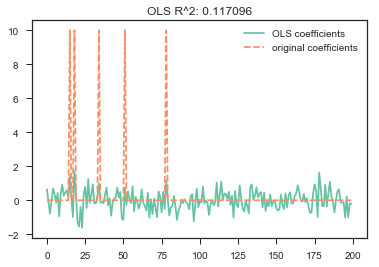

In [55]:
plt.plot(OLS.coef_, label='OLS coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("OLS R^2: %f"
          % (r2_score_OLS))
plt.show()

In [56]:
# Ridge regression
from sklearn.linear_model import Ridge
alpha = 0.1
ridge = Ridge(alpha = alpha)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
#print(lasso)
print("R^2 on test data : %f" % r2_score_ridge)

R^2 on test data : 0.135478


Again, the $R^2$ value is not very good. Let's see what the coefficients look like compared to the true coefficients.

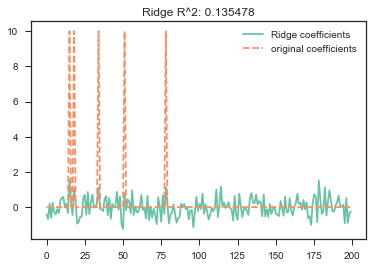

In [57]:
plt.plot(ridge.coef_, label='Ridge coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Ridge R^2: %f"
          % (r2_score_ridge))
plt.show()

In [60]:
# Lasso
from sklearn.linear_model import Lasso

alpha = 3
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
print("R^2 on test data : %f" % r2_score_lasso)

R^2 on test data : 0.450593


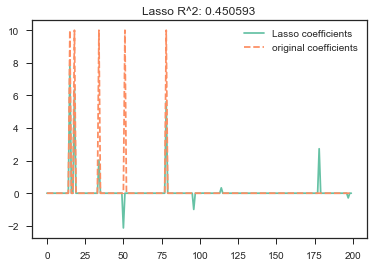

In [61]:
# We plot the results
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()

In [62]:
print(lasso.coef_)
print(coef)

[-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  7.90648271e+00
  0.00000000e+00 -0.00000000e+00  6.38291284e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.03524027e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -2.13018940e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000

# Exercise: what happens as alpha grows?

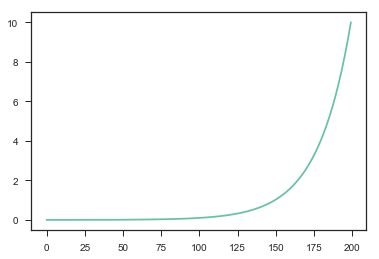

In [63]:
n_alphas = 200
alphas = np.logspace(-3, 1, n_alphas)
plt.plot(alphas)
#print(alphas)

In [64]:
lasso.set_params(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
coefs = []
r_sq = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    r_sq.append(r2_score_lasso)

    
###############################################################################
# Display results

#ax = plt.gca()
#ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

#ax.plot(alphas, coefs)
#ax.set_xscale('log')
#plt.xlabel('alpha')
#plt.ylabel('weights')
#plt.title('Lasso coefficients as a function of the regularization')
#plt.axis('tight')
#plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

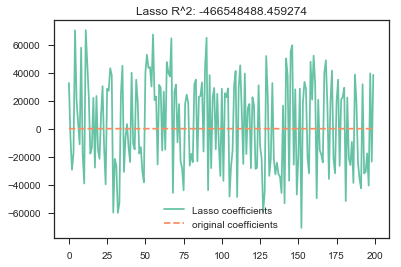

In [67]:
# This should be showing that for very small alpha, the solution is dense
# As alpha grows, we can see just a few of the coefficients separating out.
#
# Let's check
al = 10^-5
lasso = Lasso(alpha=al)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()

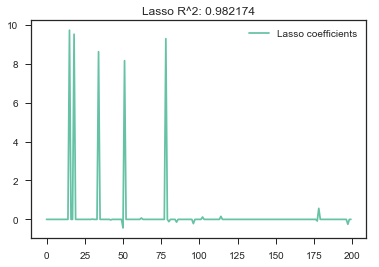

In [68]:
# We repeat for bigger alpha
#
alpha = 0.3
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
plt.plot(lasso.coef_, label='Lasso coefficients')
#plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()

In [26]:
print(sum(lasso.coef_ > 9.5))

2


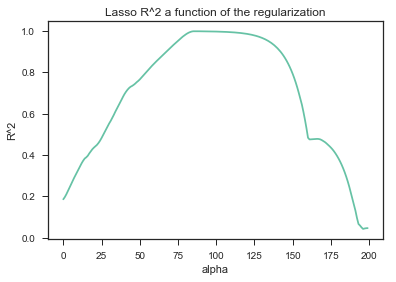

In [69]:
# Now let's plot the R^2 values
plt.plot(r_sq)
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('Lasso R^2 a function of the regularization')
#plt.axis('tight')
plt.show()

In [70]:
print(max(r_sq))
index_max = np.argmax(r_sq)
print(index_max)
alphas[index_max]

0.9993425041758522
86


0.053535666774107246

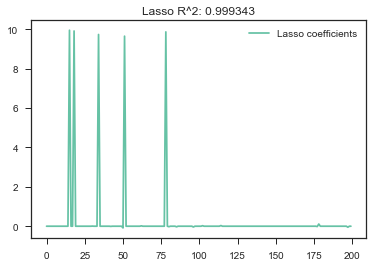

In [73]:
# We repeat for bigger alpha
#
alpha = alphas[index_max]
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
#print(lasso)
plt.plot(lasso.coef_, label='Lasso coefficients')
#plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()

In [19]:
print(sum(lasso.coef_ > 9.5))

5
